In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.404709,0.690838,-9.901657e-07,0.321826,0.609117,-0.038144,0.282470,0.476243,-0.047423,0.272432,...,0.514015,0.437101,-0.040804,0.487849,0.510549,-0.025144,0.476987,0.529656,-0.008937,A
1,0.396230,0.698691,-9.618890e-07,0.317496,0.618012,-0.035449,0.279175,0.486552,-0.043652,0.268913,...,0.504789,0.447983,-0.042318,0.478947,0.521243,-0.027107,0.467987,0.539922,-0.011034,A
2,0.404364,0.691167,-1.085991e-06,0.320881,0.620550,-0.034173,0.281876,0.488538,-0.039624,0.274985,...,0.504370,0.443473,-0.041848,0.480935,0.518375,-0.026010,0.470730,0.537178,-0.009545,A
3,0.404632,0.696710,-1.052281e-06,0.321440,0.619284,-0.034864,0.282884,0.483556,-0.041348,0.274625,...,0.506050,0.441984,-0.043420,0.481214,0.517411,-0.027144,0.471969,0.537656,-0.010142,A
4,0.402574,0.688421,-9.877260e-07,0.319436,0.606783,-0.035888,0.282093,0.475882,-0.044750,0.274728,...,0.515249,0.443647,-0.045871,0.488175,0.515548,-0.030143,0.476279,0.534189,-0.014115,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.822741,0.329701,-6.109207e-07,0.746109,0.391888,-0.009078,0.692077,0.446596,-0.032644,0.663246,...,0.762934,0.432126,-0.113997,0.760699,0.482999,-0.118826,0.756261,0.525316,-0.121940,J
413,0.815697,0.329321,-5.857391e-07,0.743668,0.385498,-0.008771,0.690929,0.443761,-0.031267,0.666219,...,0.763992,0.437390,-0.110087,0.762644,0.484401,-0.113476,0.757514,0.522487,-0.115863,J
414,0.817451,0.331259,-6.121327e-07,0.746637,0.397520,-0.009939,0.694592,0.453915,-0.033609,0.668663,...,0.767256,0.443135,-0.116868,0.766923,0.493739,-0.120261,0.762774,0.532104,-0.122106,J
415,0.818110,0.327233,-5.747438e-07,0.748232,0.385436,-0.008247,0.694494,0.446943,-0.031215,0.673492,...,0.773603,0.446919,-0.113790,0.774824,0.493803,-0.115116,0.771851,0.530100,-0.116082,J


In [10]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.404709,0.690838,-9.901657e-07,0.321826,0.609117,-0.038144,0.282470,0.476243,-0.047423,0.272432,...,0.514015,0.437101,-0.040804,0.487849,0.510549,-0.025144,0.476987,0.529656,-0.008937,A
1,0.396230,0.698691,-9.618890e-07,0.317496,0.618012,-0.035449,0.279175,0.486552,-0.043652,0.268913,...,0.504789,0.447983,-0.042318,0.478947,0.521243,-0.027107,0.467987,0.539922,-0.011034,A
2,0.404364,0.691167,-1.085991e-06,0.320881,0.620550,-0.034173,0.281876,0.488538,-0.039624,0.274985,...,0.504370,0.443473,-0.041848,0.480935,0.518375,-0.026010,0.470730,0.537178,-0.009545,A
3,0.404632,0.696710,-1.052281e-06,0.321440,0.619284,-0.034864,0.282884,0.483556,-0.041348,0.274625,...,0.506050,0.441984,-0.043420,0.481214,0.517411,-0.027144,0.471969,0.537656,-0.010142,A
4,0.402574,0.688421,-9.877260e-07,0.319436,0.606783,-0.035888,0.282093,0.475882,-0.044750,0.274728,...,0.515249,0.443647,-0.045871,0.488175,0.515548,-0.030143,0.476279,0.534189,-0.014115,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.822741,0.329701,-6.109207e-07,0.746109,0.391888,-0.009078,0.692077,0.446596,-0.032644,0.663246,...,0.762934,0.432126,-0.113997,0.760699,0.482999,-0.118826,0.756261,0.525316,-0.121940,J
413,0.815697,0.329321,-5.857391e-07,0.743668,0.385498,-0.008771,0.690929,0.443761,-0.031267,0.666219,...,0.763992,0.437390,-0.110087,0.762644,0.484401,-0.113476,0.757514,0.522487,-0.115863,J
414,0.817451,0.331259,-6.121327e-07,0.746637,0.397520,-0.009939,0.694592,0.453915,-0.033609,0.668663,...,0.767256,0.443135,-0.116868,0.766923,0.493739,-0.120261,0.762774,0.532104,-0.122106,J
415,0.818110,0.327233,-5.747438e-07,0.748232,0.385436,-0.008247,0.694494,0.446943,-0.031215,0.673492,...,0.773603,0.446919,-0.113790,0.774824,0.493803,-0.115116,0.771851,0.530100,-0.116082,J


In [11]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (417, 63)
Labels shape = (417,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [13]:
y_pred = svm.predict(x_test)
y_pred

array(['J', 'D', 'E', 'J', 'H', 'H', 'C', 'A', 'A', 'G', 'I', 'A', 'J',
       'D', 'I', 'B', 'I', 'D', 'A', 'D', 'I', 'A', 'J', 'A', 'C', 'H',
       'D', 'F', 'I', 'H', 'I', 'F', 'B', 'A', 'G', 'I', 'H', 'C', 'B',
       'F', 'I', 'B', 'G', 'I', 'H', 'C', 'E', 'J', 'A', 'I', 'J', 'A',
       'A', 'H', 'C', 'G', 'H', 'C', 'F', 'G', 'D', 'A', 'D', 'C', 'C',
       'D', 'A', 'A', 'A', 'A', 'C', 'A', 'E', 'I', 'C', 'F', 'A', 'D',
       'H', 'B', 'A', 'A', 'A', 'H'], dtype=object)

In [14]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

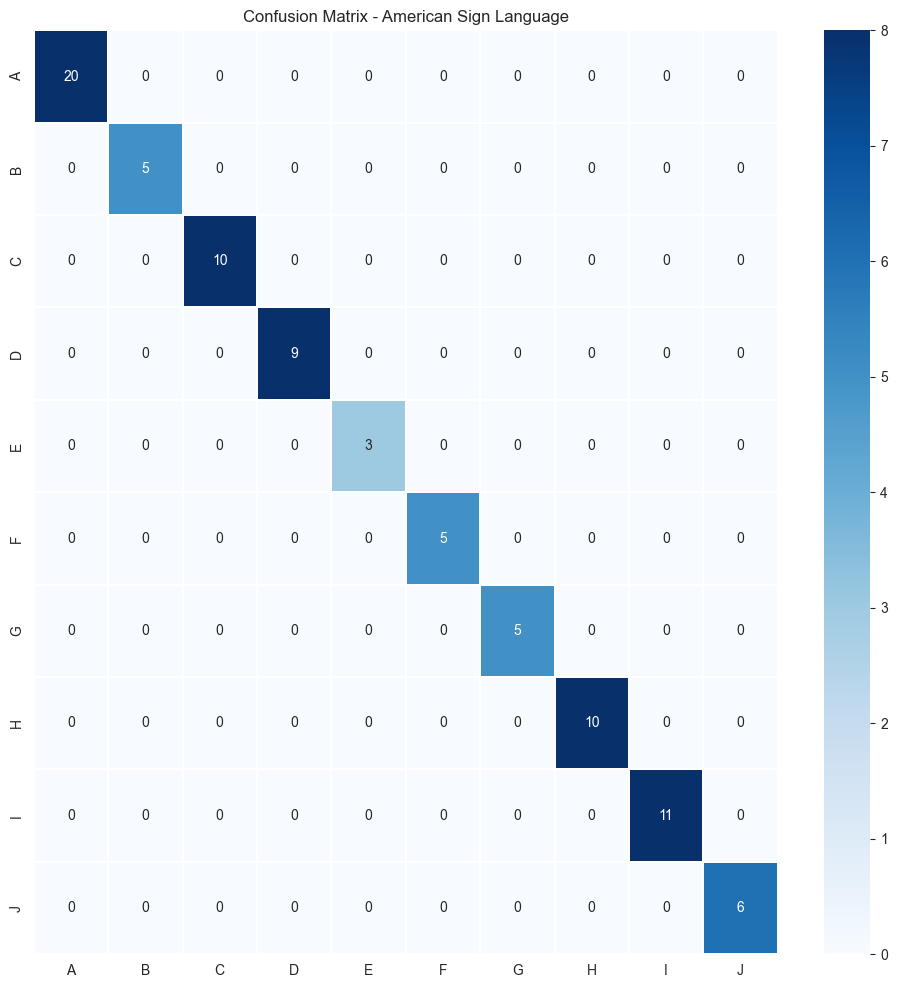

In [15]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

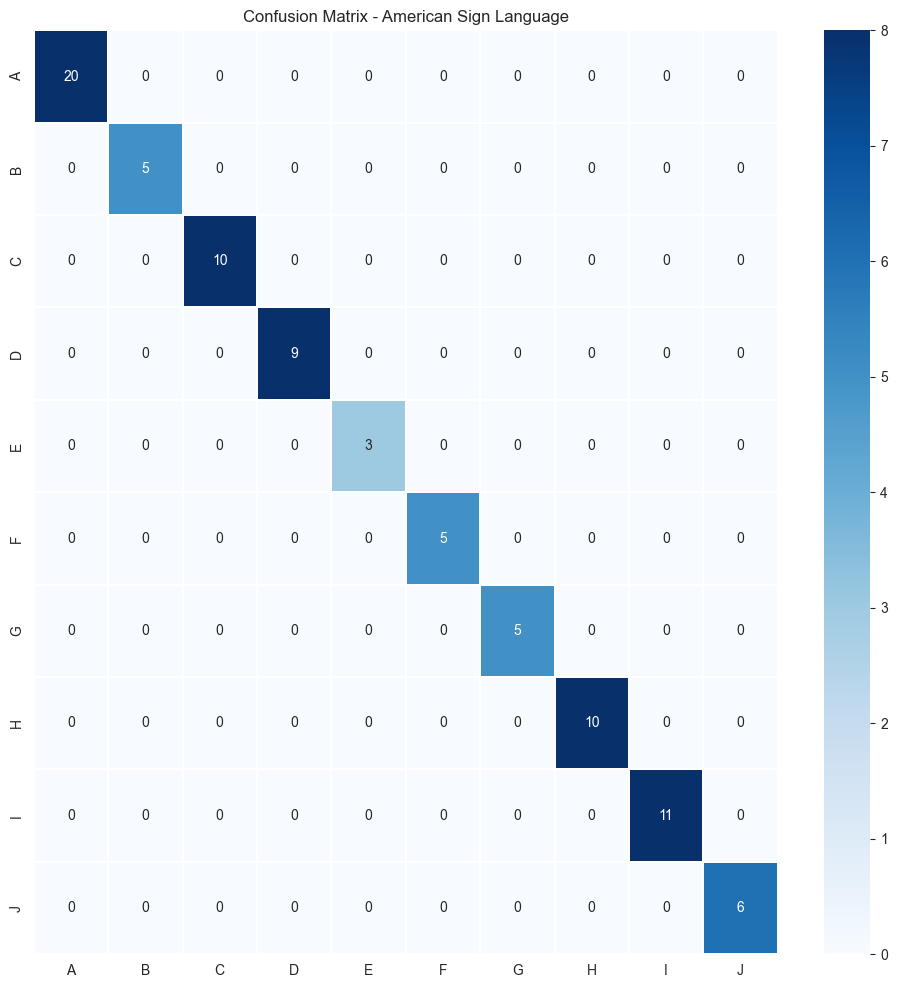

In [16]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix,
                     annot=True,
                     cmap = plt.cm.Blues,
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)